In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys
import scipy.stats as stats
%load_ext autoreload
%autoreload 2
sys.path.append('../Utils')
from eda import AnaliseEDA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
eda = AnaliseEDA()

In [3]:
df = pd.read_csv("../Dados/Customer-Churn-Records.csv")#Lendo a base de dados
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [4]:
df.info()#Analisar se h√° valores faltantes e se os tipos das colunas est√£o certos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

N√£o h√° valores faltantes, logo s√≥ nos resta vermos se h√° outliers. Ent√£o analisarei o describe das variaveis numericas e das variaveis categ√≥ricas.

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

Ap√≥s a an√°lise percebesse que n√£o h√° outliers, mas para eu ter certeza vou ter que analisar isso na analise univariada.

In [6]:
df.select_dtypes("object").describe()

Surname Geography Gender Card Type
count    10000     10000  10000     10000
unique    2932         3      2         4
top      Smith    France   Male   DIAMOND
freq        32      5014   5457      2507

Neste momento, n√£o h√° muito a ser analisado, j√° que, como visto anteriormente, os dados n√£o apresentam valores faltantes. Observa-se que a maioria dos clientes s√£o homens, utilizam o cart√£o do tipo 'Diamond' e s√£o provenientes da Fran√ßa. No entanto, essas informa√ß√µes, isoladamente, ainda n√£o oferecem grandes insights ‚Äî uma an√°lise univariada ser√° mais adequada para compreender melhor essas vari√°veis.

Antes de iniciar a an√°lise univariada, ser√£o removidas algumas colunas que n√£o agregam valor √† modelagem, como CustomerId, RowNumber e Surname.

In [7]:
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

### An√°lise Univariada
Variaveis N√∫mericas

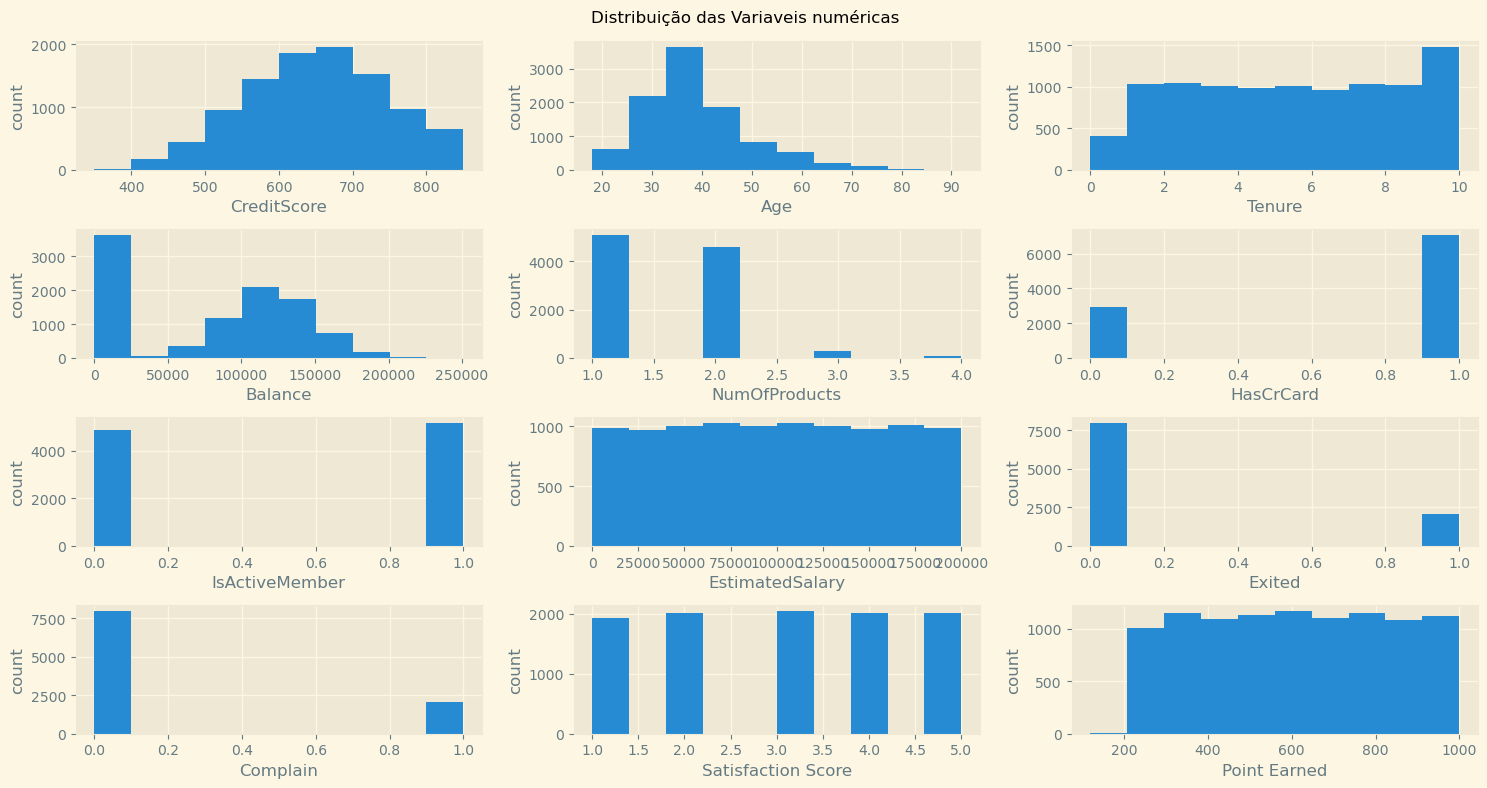

In [8]:
eda.analiseUnivariada(df, "number")

A partir das an√°lises realizadas, foi poss√≠vel identificar a presen√ßa de outliers na vari√°vel Age. No entanto, antes de optar por sua remo√ß√£o, ser√° necess√°rio verificar se esses valores extremos possuem rela√ß√£o significativa com a vari√°vel alvo Exited. Caso essa associa√ß√£o se confirme, o tratamento ser√° conduzido com cautela, a fim de preservar informa√ß√µes relevantes para o modelo. As demais vari√°veis n√£o apresentaram outliers significativos.

Al√©m disso, observou-se que as colunas Exited e Complain apresentam propor√ß√µes semelhantes, o que pode indicar uma poss√≠vel correla√ß√£o entre elas. Esse aspecto ser√° investigado com mais profundidade na an√°lise bivariada. No geral, as demais vari√°veis, at√© o momento, n√£o revelaram insights relevantes de forma isolada. Agora analisarei as variaveis categoricas

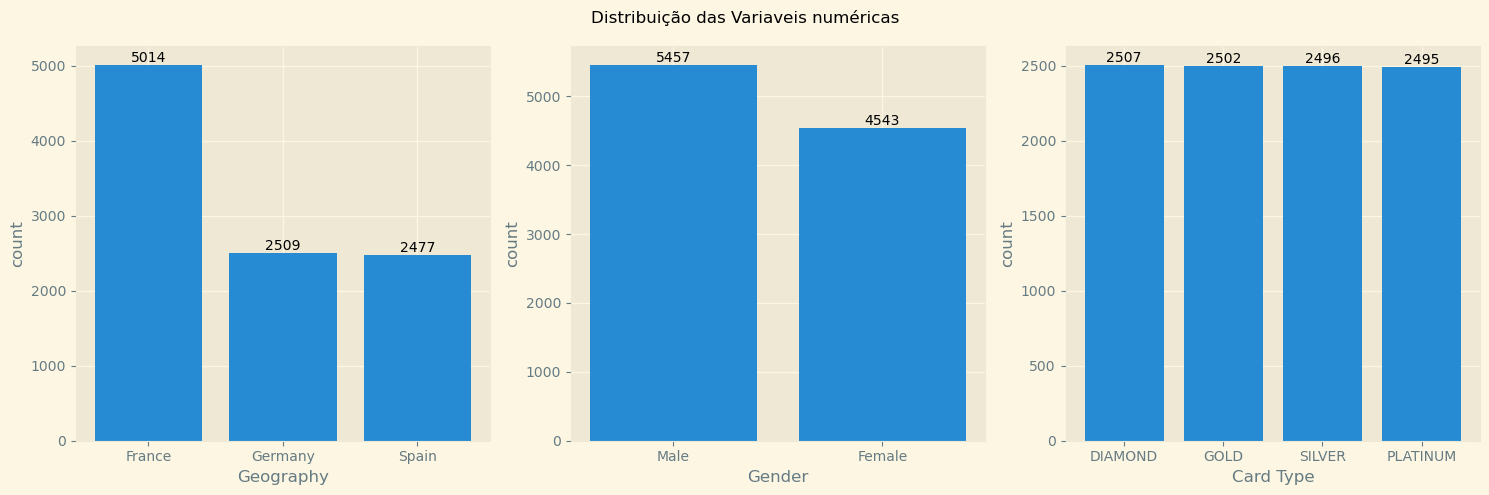

In [12]:
eda.analiseUnivariada(df, "object")

Ap√≥s a an√°lise das vari√°veis, observa-se que a maioria dos clientes √© da Fran√ßa. Em rela√ß√£o ao g√™nero, h√° uma diferen√ßa moderada na distribui√ß√£o entre homens e mulheres. J√° a vari√°vel Car Type apresenta categorias com valores bem equilibrados, sem grandes discrep√¢ncias.

---
### Conclus√£o da An√°lise Univariada
A an√°lise univariada proporcionou uma vis√£o inicial relevante sobre o comportamento das vari√°veis do conjunto de dados. Entre as vari√°veis num√©ricas, destacam-se outliers na vari√°vel Age, que requerem aten√ß√£o especial, pois podem estar associados ao churn. Tamb√©m foi poss√≠vel observar que a maioria dos clientes possui cart√£o de cr√©dito e mant√©m entre 1 a 2 produtos com o banco.

Em rela√ß√£o √†s vari√°veis categ√≥ricas, a maioria dos clientes √© da Fran√ßa, h√° um leve desequil√≠brio entre os g√™neros, e os tipos de cart√£o est√£o distribu√≠dos de forma relativamente uniforme. Al√©m disso, a semelhan√ßa nas propor√ß√µes das vari√°veis Exited e Complain pode indicar uma poss√≠vel correla√ß√£o, que ser√° explorada na an√°lise bivariada.

De modo geral, a an√°lise univariada foi fundamental para compreender a estrutura dos dados, identificar padr√µes iniciais e orientar os pr√≥ximos passos da an√°lise explorat√≥ria. Agora irei partir para as an√°lises bi variadas para agora identificar algum padr√£o entre as variavies e a target

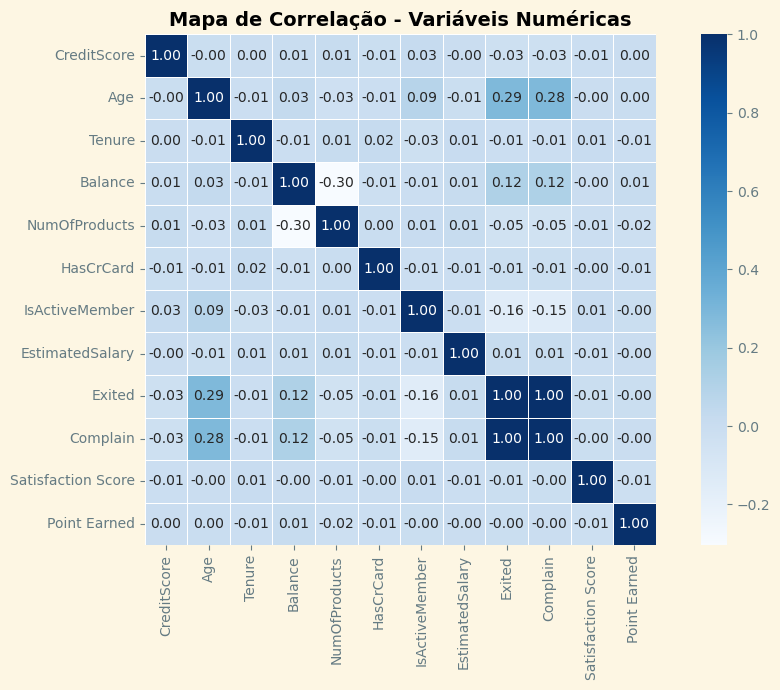

In [32]:
eda.analiseBivariada(df, "number")



#### **Insights da An√°lise de Correla√ß√£o**

Ap√≥s a an√°lise do gr√°fico de correla√ß√£o apresentado, percebe-se uma poss√≠vel **correla√ß√£o fort√≠ssima entre as vari√°veis `Complain` e `Exited`**, praticamente **100%**, o que indica que **clientes que j√° reclamaram tendem a sair da empresa**.

Al√©m disso, a vari√°vel `Complain` tamb√©m apresenta uma correla√ß√£o positiva com a idade (`0.29`), sugerindo que **clientes que reclamam tendem a ser mais velhos**. Portanto, aqueles outliers observados n√£o s√£o casos isolados, e sim **um padr√£o de comportamento ‚Äî o que justifica a manuten√ß√£o desses dados na base**.

Ainda analisando a vari√°vel `Complain`, nota-se uma correla√ß√£o negativa com `IsActiveMember` (`-0.16`), o que sugere que **clientes menos ativos tamb√©m tendem a reclamar mais**. Apesar de essa correla√ß√£o ser fraca, ela **refor√ßa um padr√£o comportamental** relevante.

Outro ponto observado √© que **clientes com menos produtos tamb√©m tendem a reclamar mais** (`-0.05`) ‚Äî e, como a reclama√ß√£o est√° fortemente associada √† sa√≠da, **isso levanta a hip√≥tese de que ter poucos produtos tamb√©m pode estar associado √† sa√≠da**.

‚ö†Ô∏è **Importante:** essas observa√ß√µes ainda s√£o hip√≥teses. Como sabemos, **correla√ß√£o n√£o implica causalidade**. No entanto, **essas rela√ß√µes j√° apontam poss√≠veis padr√µes** de comportamento que merecem ser analisados com mais profundidade.

---

Al√©m disso, observamos que **clientes com saldo (balance) mais alto tendem a possuir menos produtos (`-0.30`)**. Juntando isso com a informa√ß√£o de que **clientes com saldo maior tamb√©m tendem a sair**, podemos inferir que **clientes com poucos produtos e saldo elevado podem estar mais propensos √† sa√≠da**.

---

#### Pr√≥ximos passos:

Antes de seguir diretamente para os testes estat√≠sticos (como testes de hip√≥tese), irei realizar uma **an√°lise bivariada com as vari√°veis categ√≥ricas**, para entender melhor como cada categoria se distribui em rela√ß√£o √† vari√°vel de sa√≠da (`Exited`).


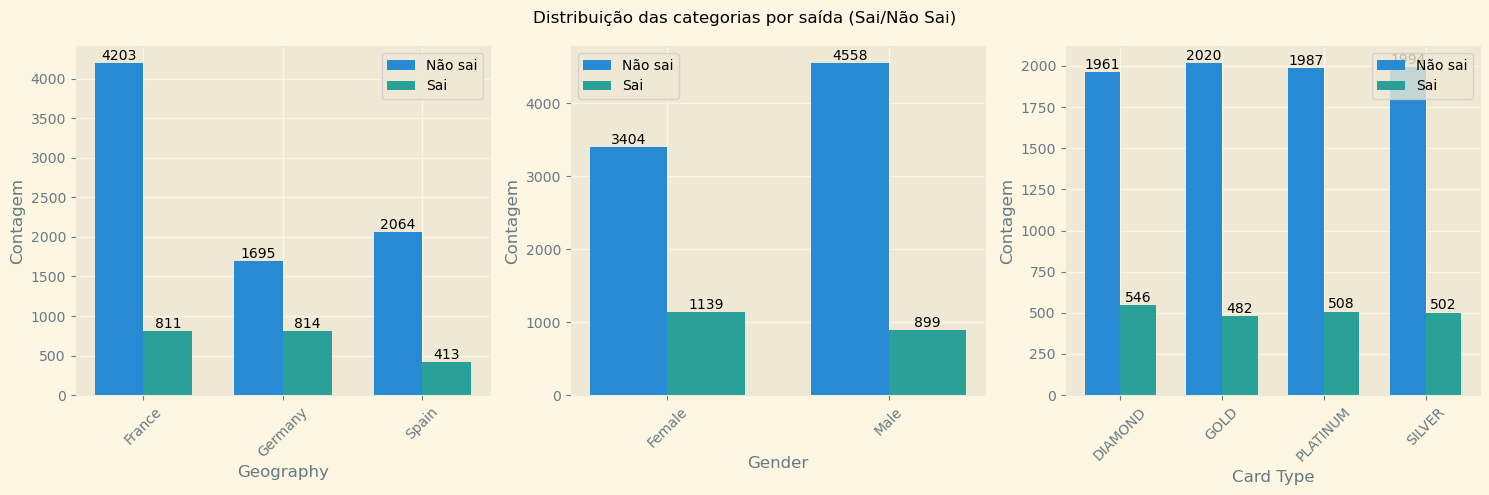

In [33]:
eda.analiseBivariada(df, "object")



#### **üìä Insights da An√°lise Bivariada das Vari√°veis Categ√≥ricas**

Ap√≥s a an√°lise dos gr√°ficos bivariados, os seguintes padr√µes foram identificados:

* **Regi√£o do cliente:** Esta foi a √∫nica vari√°vel categ√≥rica que demonstrou um padr√£o relevante. Observa-se que, na **Alemanha**, aproximadamente **50% dos clientes saem da empresa**, o que pode indicar **problemas espec√≠ficos relacionados √† atua√ß√£o nesse pa√≠s**. Essa anomalia merece investiga√ß√£o mais profunda, pois pode estar ligada a fatores econ√¥micos, culturais ou operacionais espec√≠ficos da regi√£o.

* **G√™nero:** N√£o foi identificado um padr√£o claro de sa√≠da entre homens e mulheres. A propor√ß√£o de clientes que saem e os que permanecem √© bastante semelhante entre os g√™neros, indicando que **o g√™nero n√£o parece influenciar diretamente a sa√≠da dos clientes**.

* **Tipo de cart√£o:** Tamb√©m **n√£o h√° diferen√ßas significativas** entre os tipos de cart√£o (como Blue, Silver, Gold e Platinum) em rela√ß√£o √† taxa de sa√≠da. A distribui√ß√£o dos clientes que saem e permanecem √© relativamente constante entre as categorias.

---

#### **üîé Conclus√£o Parcial**

De modo geral, **a vari√°vel categ√≥rica que mais chama aten√ß√£o √© a localiza√ß√£o geogr√°fica do cliente**, especialmente a **Alemanha**, onde a taxa de sa√≠da √© expressivamente maior. J√° as vari√°veis **g√™nero** e **tipo de cart√£o** **n√£o apresentaram ind√≠cios de correla√ß√£o com a sa√≠da (`Exited`)**.

---

#### **üß™ Pr√≥ximo Passo da An√°lise**

Diante da alta taxa de sa√≠da na Alemanha, o pr√≥ximo passo ser√° **analisar a m√©dia das vari√°veis num√©ricas por pa√≠s**, com foco especial na Alemanha. O objetivo √© verificar se vari√°veis como `Balance`, `IsActiveMember` e `NumOfProducts` apresentam **valores distintos ou comportamentos anormais nessa regi√£o**, o que poderia ajudar a explicar a alta taxa de evas√£o observada.



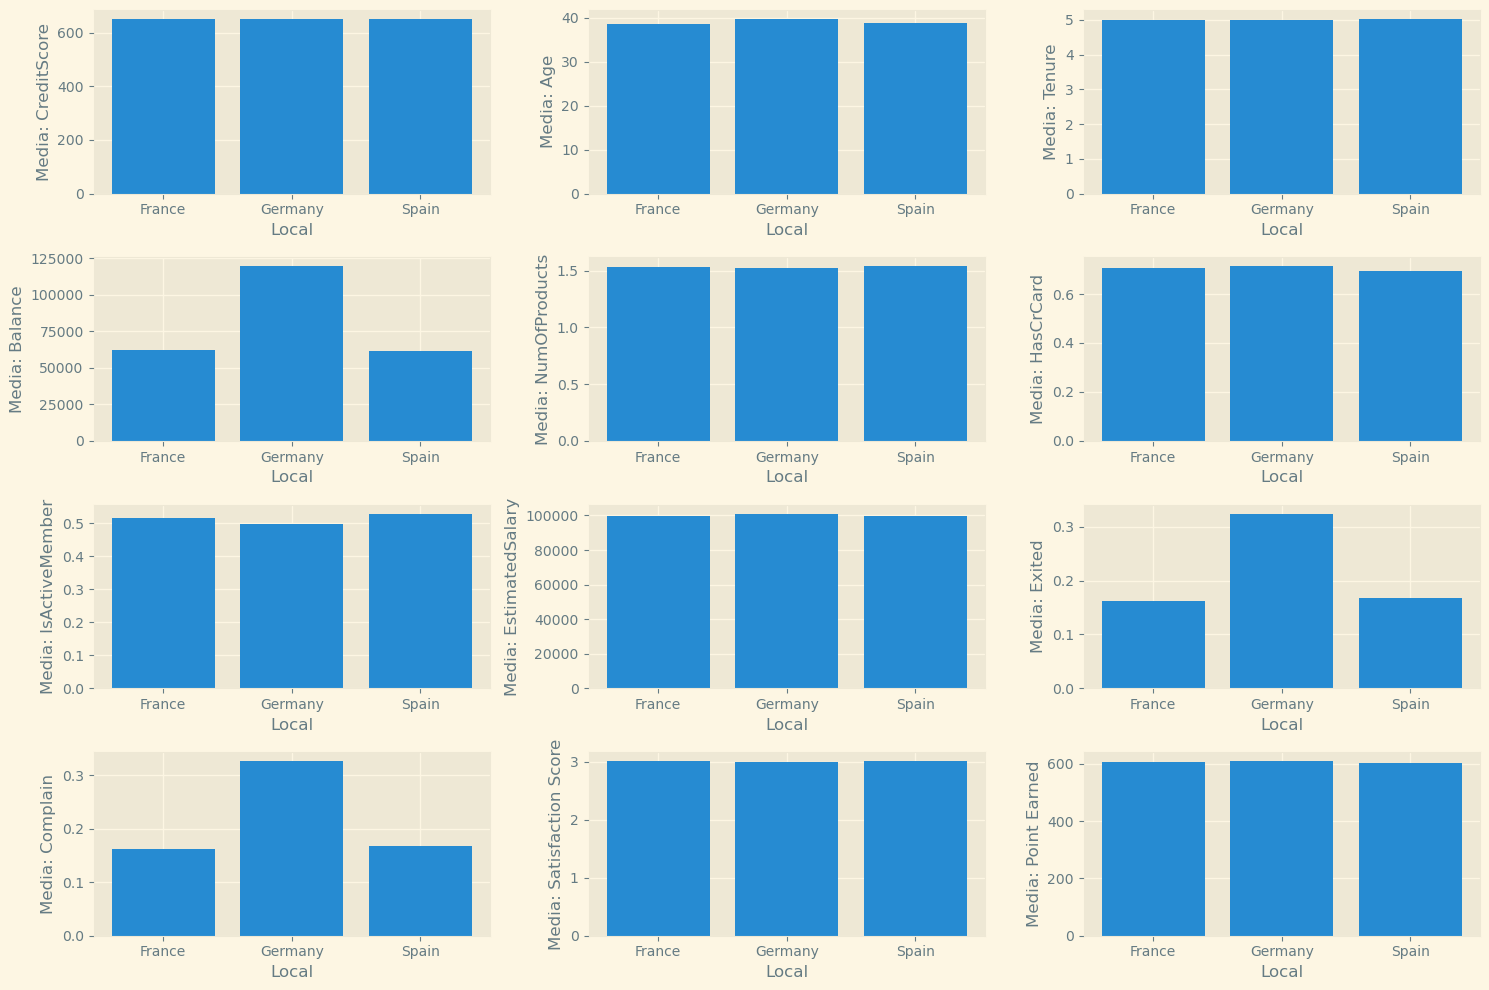

In [ ]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=3, nrows=4)
axs = axs.flatten()
for i, coluna in enumerate(df.select_dtypes(include="number").columns):
    f = df[["Geography", coluna]].groupby("Geography").mean().reset_index()
    f.columns = ["Local", "Media"]
    axs[i].bar(f["Local"], f["Media"])
    axs[i].set_xlabel("Local")
    axs[i].set_ylabel(f"Media: {coluna}")

plt.tight_layout()
plt.show()



#### ** Interpreta√ß√£o dos Fatores de Evas√£o na Alemanha**

Fica evidente que a **alta taxa de evas√£o dos clientes na Alemanha (cerca de 50%) est√° fortemente associada a tr√™s fatores principais**: maior frequ√™ncia de reclama√ß√µes, maior saldo (`Balance`) e menor n√∫mero m√©dio de produtos. Esses elementos, conforme j√° observado na an√°lise das vari√°veis num√©ricas, s√£o **caracter√≠sticas comuns entre os clientes que tendem a sair da empresa**.

No caso da **Alemanha**, esse padr√£o √© ainda mais evidente: os clientes alem√£es s√£o os que **mais reclamam** e tamb√©m os que apresentam, em m√©dia, os **maiores saldos banc√°rios**, refor√ßando a associa√ß√£o entre essas vari√°veis e a sa√≠da dos clientes.

Embora o n√∫mero de produtos seja baixo tamb√©m em outras regi√µes, apenas na Alemanha essa caracter√≠stica parece estar **mais diretamente relacionada √† evas√£o**. Isso sugere que **a baixa ades√£o a produtos pode ser um fator mais sens√≠vel naquele pa√≠s**, o que **abre espa√ßo para estrat√©gias voltadas √† oferta de novos produtos** ou **engajamento mais eficaz dos clientes alem√£es**, como forma de reduzir a taxa de sa√≠da.

Boa observa√ß√£o, Rian! Vamos incluir a **idade** na conclus√£o, j√° que ela tamb√©m apresentou correla√ß√£o relevante com a evas√£o. Aqui est√° a **vers√£o final da conclus√£o da an√°lise bivariada**, agora completa:

---

####  **Conclus√£o da An√°lise Bivariada**

A an√°lise bivariada ‚Äî considerando tanto as vari√°veis num√©ricas quanto as categ√≥ricas ‚Äî revelou **padr√µes significativos associados √† evas√£o de clientes**.

Nas **vari√°veis num√©ricas**, os principais fatores associados √† sa√≠da foram:

* **Clientes que reclamam** (`Complain`) apresentaram uma **correla√ß√£o fort√≠ssima com a evas√£o**, praticamente determin√≠stica;
* **Idade** demonstrou uma correla√ß√£o positiva, indicando que **clientes mais velhos tendem a sair com maior frequ√™ncia**;
* **Saldo banc√°rio** (`Balance`) foi outro destaque, com clientes que saem apresentando, em m√©dia, **saldos mais elevados**;
* **Menor n√∫mero de produtos** (`NumOfProducts`) tamb√©m apareceu como um fator, ainda que com correla√ß√£o fraca, mas com **padr√£o recorrente entre os que saem**;
* **Menor n√≠vel de atividade** (`IsActiveMember`) apresentou uma correla√ß√£o negativa, sugerindo que **clientes menos ativos est√£o mais propensos √† evas√£o**.

J√° entre as **vari√°veis categ√≥ricas**, a **regi√£o do cliente** se destacou como o fator mais relevante. Em especial, a **Alemanha** apresentou uma taxa de evas√£o de aproximadamente **50%**, significativamente acima das demais regi√µes. Os clientes dessa regi√£o concentram exatamente os perfis identificados anteriormente: **mais velhos, com maiores saldos, menos produtos e maior n√∫mero de reclama√ß√µes** ‚Äî o que refor√ßa a ideia de que esses fatores, combinados, **potencializam a sa√≠da dos clientes alem√£es**.

Por outro lado, vari√°veis como **g√™nero** e **tipo de cart√£o** **n√£o demonstraram diferen√ßas significativas** entre os que saem e os que permanecem, e portanto **n√£o parecem influenciar diretamente a evas√£o**.

---

#### Pr√≥ximos Passos

Com base nessa an√°lise, algumas **hip√≥teses fortes foram levantadas** sobre os fatores que podem influenciar a evas√£o de clientes. A pr√≥xima etapa ser√° aplicar **testes estat√≠sticos apropriados** (como testes de hip√≥tese ou regress√£o) para validar essas rela√ß√µes, identificando quais vari√°veis t√™m **efeito estatisticamente significativo**. Isso permitir√° **direcionar a√ß√µes de reten√ß√£o mais precisas**, especialmente para grupos de maior risco, como os **clientes da Alemanha com altos saldos e baixa intera√ß√£o com a empresa**.



In [57]:
dfSemOutliears.to_csv("../Dados/Base de dados Tratada.csv")

| **Insight**                                          | **Descri√ß√£o**                                                                                     | **Recomenda√ß√£o**                                                                 |
|------------------------------------------------------|-------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **Pessoas mais velhas cancelam mais cart√µes**        | Clientes com idades mais avan√ßadas tendem a cancelar mais cart√µes.                               | Ofere√ßa benef√≠cios personalizados para clientes mais velhos (ex.: suporte VIP). |
| **N√∫mero de produtos est√° inversamente relacionado ao churn** | Clientes com mais produtos contratados (empr√©stimos, seguros, etc.) tendem a cancelar menos.    | Promova a contrata√ß√£o de produtos adicionais para aumentar a reten√ß√£o.          |
| **Membros ativos tendem a n√£o cancelar**             | Clientes que s√£o membros ativos possuem menor propens√£o a cancelar seus cart√µes.                 | Promova programas de engajamento para aumentar a atividade dos clientes.        |